In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPool2D, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
data_root = "../datasets/digit-recognizer/"
train = pd.read_csv(data_root+'train.csv')
test = pd.read_csv(data_root+'test.csv')

In [4]:
# works on tensors
# train, val = tf.split(tf.random.shuffle(train), [train_num, val_num], 0)

In [5]:
y_train = train['label']
x_train = train.drop(['label'], axis=1)
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
x_train.isnull().any(axis=1).describe()

count     42000
unique        1
top       False
freq      42000
dtype: object

In [7]:
test.isnull().any(axis=1).describe()

count     28000
unique        1
top       False
freq      28000
dtype: object

In [8]:
x_train = x_train/255.0
test = test/255.0

In [9]:
x_train['pixel345']

0        0.000000
1        0.094118
2        0.000000
3        0.082353
4        0.764706
           ...   
41995    0.537255
41996    0.000000
41997    0.000000
41998    0.858824
41999    0.850980
Name: pixel345, Length: 42000, dtype: float64

In [10]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [11]:
y_train = to_categorical(y_train, num_classes=10)

In [12]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [39]:
# data augmentation
data_aug = 1
if data_aug:
    gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=20, zoom_range=0.2)
    gen.fit(x_train)

In [40]:
print(x_val.shape)
print(y_val.shape)
print(x_train.shape)
print(y_train.shape)

(4200, 28, 28, 1)
(4200, 10)
(37800, 28, 28, 1)
(37800, 10)


In [17]:
y_val[2]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

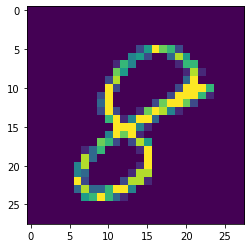

In [18]:
g = plt.imshow(x_train[0][:,:,0])

In [19]:
y_val_class = pd.Series(np.argmax(y_val, axis=1))
y_val_class.value_counts()

1    485
4    461
7    446
3    418
6    413
0    411
9    409
2    403
8    382
5    372
dtype: int64

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [43]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
epochs = 10
batch_size = 128

In [23]:
history = None

In [44]:
if data_aug:
    history = model.fit_generator(gen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
296/295 [==============================] - 10s 34ms/step - loss: 0.0890 - accuracy: 0.9728 - val_loss: 0.0267 - val_accuracy: 0.9919
Epoch 2/10
296/295 [==============================] - 10s 33ms/step - loss: 0.0791 - accuracy: 0.9768 - val_loss: 0.0186 - val_accuracy: 0.9943
Epoch 3/10
296/295 [==============================] - 10s 34ms/step - loss: 0.0724 - accuracy: 0.9780 - val_loss: 0.0245 - val_accuracy: 0.9924
Epoch 4/10
296/295 [==============================] - 10s 34ms/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.0204 - val_accuracy: 0.9921
Epoch 5/10
296/295 [==============================] - 10s 34ms/step - loss: 0.0674 - accuracy: 0.9796 - val_loss: 0.0172 - val_accuracy: 0.9945
Epoch 6/10
296/295 [==============================] - 10s 34ms/step - loss: 0.0661 - accuracy: 0.9807 - val_loss: 0.0235 - val_accuracy: 0.9931
Epoch 7/10
296/295 [==============================] - 10s 33ms/step - loss: 0.0641 - accuracy: 0.9810 - val_loss: 0.0221 - val_accuracy:

In [35]:
history = model.fit(x=x_train, y=y_train, batch_size=batch_size,
            epochs=epochs, validation_data=(x_val, y_val), 
                    steps_per_epoch=x_train.shape[0]//batch_size, verbose=1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37672/37800 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

In [36]:
model.evaluate(x=x_val, y=y_val, verbose=2)

4200/1 - 1s - loss: 0.0498 - accuracy: 0.9943


[0.03283035471330753, 0.9942857]

In [37]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.007437,0.997405,0.031617,0.994048
1,0.005699,0.997983,0.031058,0.994048
2,0.004589,0.998567,0.032163,0.993571
3,0.004582,0.998487,0.030569,0.994286
4,0.004143,0.998620,0.031643,0.994048
5,0.004259,0.998460,0.031177,0.994048
6,0.003282,0.998885,0.031729,0.994048
7,0.002985,0.998938,0.032019,0.994286
8,0.002680,0.999097,0.032858,0.994286
9,0.003035,0.998912,0.032830,0.994286


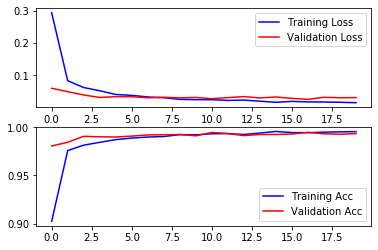

In [27]:
# loss and accuracy plots
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend = ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'], color='b', label='Training Acc')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation Acc', axes=ax[1])
legend = ax[1].legend(loc='best')

In [28]:
# confusion matrix
y_pred = model.predict(x_val)
y_pred_class = np.argmax(y_pred, axis=1)
y_true_class = np.argmax(y_val, axis=1)

# use tf.math.confusion_matrix later

c_matrix = confusion_matrix(y_true_class, y_pred_class)
print(c_matrix)
c_matrix = pd.DataFrame(c_matrix)
c_matrix

[[409   0   0   0   0   0   1   0   0   1]
 [  0 484   0   0   0   0   0   1   0   0]
 [  0   0 401   0   0   0   0   0   1   1]
 [  0   0   0 415   0   0   0   0   3   0]
 [  0   0   1   0 456   0   1   0   0   3]
 [  0   0   0   2   0 366   3   0   1   0]
 [  1   1   0   0   1   0 409   0   1   0]
 [  0   0   1   0   0   0   0 445   0   0]
 [  0   0   0   0   0   0   0   0 381   1]
 [  1   0   0   0   1   0   0   1   0 406]]


,0,1,2,3,4,5,6,7,8,9
0,409,0,0,0,0,0,1,0,0,1
1,0,484,0,0,0,0,0,1,0,0
2,0,0,401,0,0,0,0,0,1,1
3,0,0,0,415,0,0,0,0,3,0
4,0,0,1,0,456,0,1,0,0,3
5,0,0,0,2,0,366,3,0,1,0
6,1,1,0,0,1,0,409,0,1,0
7,0,0,1,0,0,0,0,445,0,0
8,0,0,0,0,0,0,0,0,381,1
9,1,0,0,0,1,0,0,1,0,406


In [29]:
# analyse model errors
errors = (y_pred_class != y_true_class)


In [30]:
y_pred_class_e = y_pred_class[errors]
y_pred_e = y_pred[errors]
y_true_class_e = y_true_class[errors]
x_val_e = x_val[errors]


In [31]:
num_e = x_val_e.shape[0]
e = 0

# plt.rcParams.update({'font.size': 12})

# plot with 4 columns and #errors / 4 + 1 rows
if num_e%4 == 0: nrows=num_e/4 
else: nrows=num_e//4+1
fig, ax = plt.subplots(nrows=nrows, ncols=4, 
                      sharex=True, sharey=True, figsize=(20, 40))
fig.tight_layout()
# you could also use subplots_adjust function with adjustment button

for r in range(nrows):
    for c in range(4):
        ax[r, c].imshow(x_val_e[e].reshape((28, 28)))
        ax[r,c].set_title(f'Predicted Label: {y_pred_class_e[e]}\tTrue Label: {y_true_class_e[e]}')
        e += 1

TypeError: 'float' object cannot be interpreted as an integer

<Figure size 1440x2880 with 0 Axes>

In [ ]:
# make submission
res = np.argmax(model.predict(test), axis=1)

In [ ]:
submission = pd.DataFrame({'ImageId':range(1, res.shape[0]+1), 'Label': res})
submission.head()

In [ ]:
submission.to_csv('../datasets/digit-recognizer/digitRecognizer.csv', index=False)